In [6]:
from random_forest import *
import pandas as pd
from utils import *
import random

In [4]:
# read data
data = pd.read_csv("sample_data\sonar.csv").values.tolist()

# make train/test
random.shuffle(data)
n_train_data = int(len(data) * .9)
train, test = data[: n_train_data], data[n_train_data:]

In [7]:
accuracies = []

for n in [1,3,10,20,30,50,100,200]:
    # our classifier
    rfc = random_forest_classifier(n_features = 7, n_trees = n, max_depth = 10, min_size = 1,  n_sample_rate= .9)
    rfc.build_model(train)


    predictions = rfc.predict(test)
    labels = [i[-1] for i in test]

    n_corr = 0
    for i,j in zip(labels, predictions):
        if i == j:
            n_corr += 1
    accuracies.append(round(n_corr/len(labels),4))

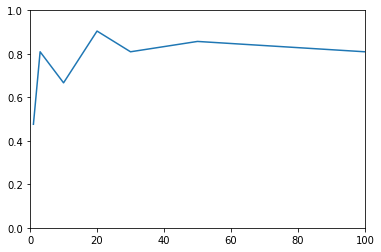

In [14]:
import matplotlib.pyplot as plt
plt.plot([1,3,10,20,30,50,100,200],accuracies)
plt.axis([0, 100, 0, 1])
plt.show()

# accuracy trend when number of trees becomes large